### HDFC Bank Opening Stock Price Prediction:


In [65]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf 

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [67]:
file = "C:\\Users\\Mohd Kaif\\Downloads\\HDFC_StockData.csv"
data = pd.read_csv(file)

In [68]:
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.50,293.50,293.50,293.50,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.00,317.00,297.00,304.00,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.00,303.90,285.00,295.00,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
3,2000-01-06,HDFC,EQ,292.80,301.00,314.00,295.00,296.00,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
4,2000-01-07,HDFC,EQ,296.45,290.00,296.35,281.00,287.10,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,HDFC,EQ,2497.35,2500.00,2534.10,2483.20,2502.00,2509.80,2508.07,3916088,9.821805e+14,121028.0,2440395.0,0.6232
5302,2021-04-27,HDFC,EQ,2509.80,2494.15,2526.80,2486.25,2514.00,2518.40,2509.18,2040799,5.120730e+14,102250.0,1040749.0,0.5100
5303,2021-04-28,HDFC,EQ,2518.40,2516.10,2609.00,2508.30,2575.00,2577.00,2574.21,3407461,8.771527e+14,117425.0,1815110.0,0.5327
5304,2021-04-29,HDFC,EQ,2577.00,2590.90,2628.00,2533.00,2539.70,2538.85,2569.65,3005468,7.722995e+14,132826.0,1472924.0,0.4901


In [69]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.5,293.50,293.5,293.5,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.0,317.00,297.0,304.0,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.0,303.90,285.0,295.0,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
3,2000-01-06,HDFC,EQ,292.80,301.0,314.00,295.0,296.0,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
4,2000-01-07,HDFC,EQ,296.45,290.0,296.35,281.0,287.1,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN


In [70]:
data = data[['Date','Open']]

In [71]:
data.head()

,Date,Open
0,2000-01-03,293.5
1,2000-01-04,317.0
2,2000-01-05,290.0
3,2000-01-06,301.0
4,2000-01-07,290.0


In [72]:
# Convert 'Date' column to datetime and create data exploration copy
data['Date'] = pd.to_datetime(data['Date'])
data_explore = data.assign(Date=data['Date'].dt.date).set_index('Date').copy()

C:\Users\Mohd Kaif\AppData\Local\Temp\ipykernel_20228\690871502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


In [73]:
data_explore.head()

,Open
Date,
2000-01-03,293.5
2000-01-04,317.0
2000-01-05,290.0
2000-01-06,301.0
2000-01-07,290.0


**EDA:**

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5306 non-null   datetime64[ns]
 1   Open    5306 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 83.0 KB


In [75]:
data_explore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5306 entries, 2000-01-03 to 2021-04-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5306 non-null   float64
dtypes: float64(1)
memory usage: 82.9+ KB


In [76]:
data.isnull().sum()

Date    0
Open    0
dtype: int64

In [77]:
data.describe()

,Date,Open
count,5306,5306.000000
mean,2010-08-18 21:26:56.132679936,1284.393074
min,2000-01-03 00:00:00,284.000000
25%,2005-04-13 12:00:00,669.712500
50%,2010-08-17 12:00:00,1135.400000
75%,2015-12-17 18:00:00,1813.812500
max,2021-04-30 00:00:00,3148.000000
std,NaN,709.703665


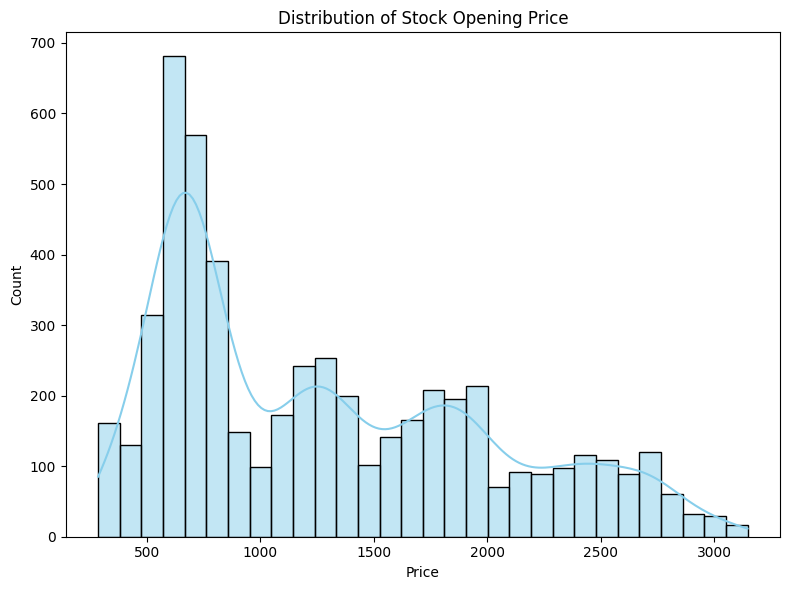

In [78]:
# Create histogram for Stock Opening Price
plt.figure(figsize=(8, 6))
sns.histplot(data['Open'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Stock Opening Price')
plt.xlabel('Price')
plt.tight_layout()
plt.show()

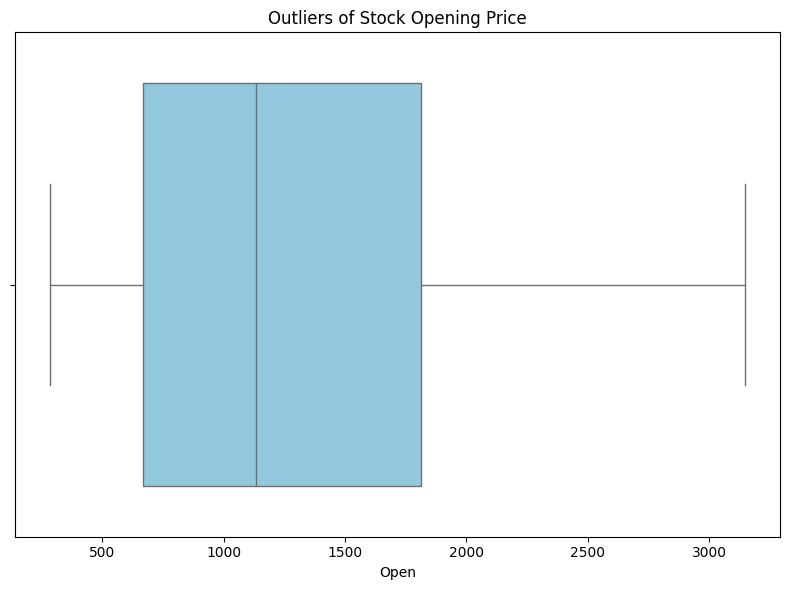

In [79]:
# Create boxplot for Stock Opening Price
plt.figure(figsize=(8, 6))
sns.boxplot(x='Open', data=data, color='skyblue')
plt.title('Outliers of Stock Opening Price')
plt.tight_layout()
plt.show()

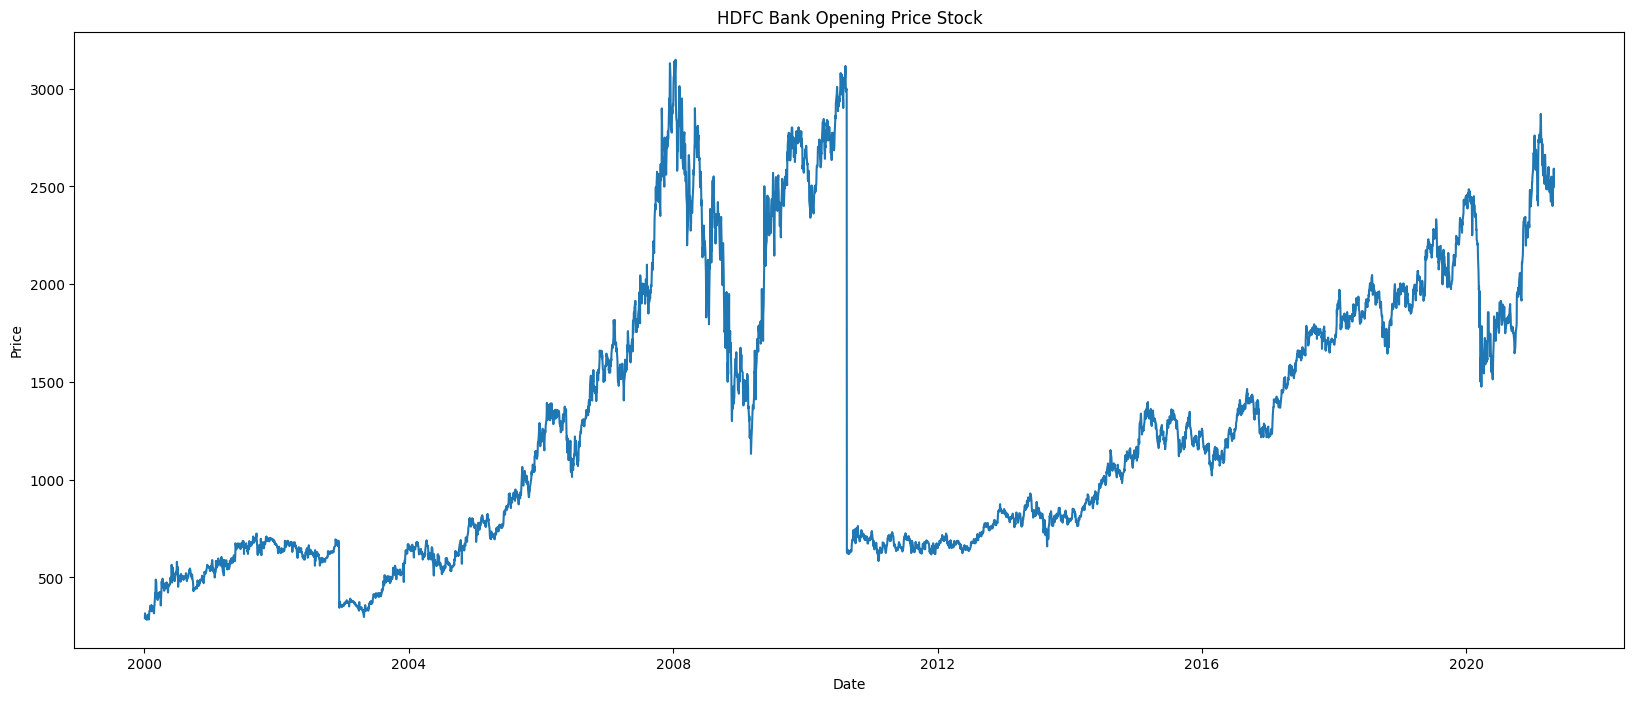

In [80]:
# Create a line plot for HDFC Bank Opening Price Stock
plt.figure(figsize=(20, 8))
plt.plot(data_explore)
plt.title("HDFC Bank Opening Price Stock")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

<Figure size 1000x1000 with 0 Axes>

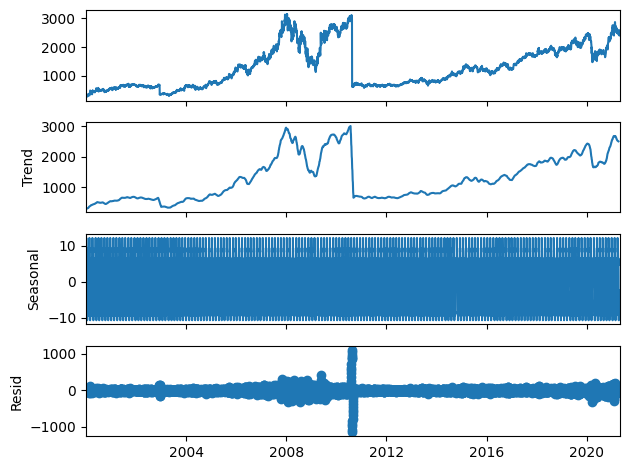

In [81]:
# Decompose the time series data
decompose = seasonal_decompose(data_explore, period=30, model='additive')

# Set a larger figure size for better visualization
plt.figure(figsize=(10, 10))
decompose.plot()
plt.show()

**Data Preprocessing:**

In [82]:
# Separate the features and label
dates = data['Date'].values
price = data['Open'].values

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
price_scaled = scaler.fit_transform(price.reshape(-1, 1))

In [84]:
price_scaled

array([[0.00331704],
       [0.01152235],
       [0.00209497],
       ...,
       [0.77936453],
       [0.80548184],
       [0.77482542]])

In [85]:
# Convert the price_scaled dimension from 2D to 1D before going to window batch
price_scaled.reshape(-1)
# Squeeze the shape to get only 1 dimension
price_scaled = np.squeeze(price_scaled)

In [86]:
from sklearn.model_selection import train_test_split
# Split data to 20% test set
X_train, X_test, y_train, y_test = train_test_split(price_scaled, dates, 
                                                    test_size=0.2, shuffle=False
                                                   )

In [87]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [88]:
# Apply the windowed dataset function to X_train and X_test
batch_X_train = windowed_dataset(X_train, 
                                 window_size=30, 
                                 batch_size=100, 
                                 shuffle_buffer=1000
                                )

batch_X_test = windowed_dataset(X_test, 
                                 window_size=30, 
                                 batch_size=100, 
                                 shuffle_buffer=1000
                                )

In [89]:
batch_X_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>

In [90]:
import tensorflow as tf
# Create sequential model using LSTM
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(256, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile model using the suitable parameters
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-03, momentum=0.9)
model.compile(optimizer=optimizer, 
              metrics=['mae'],
              loss=tf.keras.losses.Huber()
             )

In [91]:
# Define the MAE threshold
#threshold_mae = (data['Open'].max() - data['Open'].min()) * 0.1
threshold_mae = (np.max(price_scaled) - np.min(price_scaled)) * 0.1
threshold_mae

0.1

In [92]:
# Callback function to stop training early after passing the MAE threshold
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('mae')<threshold_mae):
            self.model.stop_training=True
            print(f"\nThe model's MAE has reached < 10% of data scale")

callbacks = myCallback()

In [93]:
# Create a learning rate scheluder function
def lr_schedule(epoch):
    if epoch <= 25:
        return 0.001
    else:
        return 0.0001
    
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [94]:
# Train the model
history = model.fit(batch_X_train, 
                    validation_data=batch_X_test, 
                    epochs=50, 
                    callbacks=[callbacks, lr_scheduler]
                   )

Epoch 1/50
43/43 [==============================] - 24s 320ms/step - loss: 0.0489 - mae: 0.2130 - val_loss: 0.0680 - val_mae: 0.3553 - lr: 0.0010
Epoch 2/50
43/43 [==============================] - 12s 282ms/step - loss: 0.0236 - mae: 0.1536 - val_loss: 0.0354 - val_mae: 0.2496 - lr: 0.0010
Epoch 3/50
43/43 [==============================] - 12s 279ms/step - loss: 0.0212 - mae: 0.1603 - val_loss: 0.0297 - val_mae: 0.2274 - lr: 0.0010
Epoch 4/50
43/43 [==============================] - 13s 283ms/step - loss: 0.0200 - mae: 0.1562 - val_loss: 0.0275 - val_mae: 0.2182 - lr: 0.0010
Epoch 5/50
43/43 [==============================] - 12s 270ms/step - loss: 0.0184 - mae: 0.1511 - val_loss: 0.0251 - val_mae: 0.2085 - lr: 0.0010
Epoch 6/50
43/43 [==============================] - 12s 279ms/step - loss: 0.0172 - mae: 0.1455 - val_loss: 0.0228 - val_mae: 0.1983 - lr: 0.0010
Epoch 7/50
43/43 [==============================] - 12s 280ms/step - loss: 0.0157 - mae: 0.1385 - val_loss: 0.0206 - val_mae

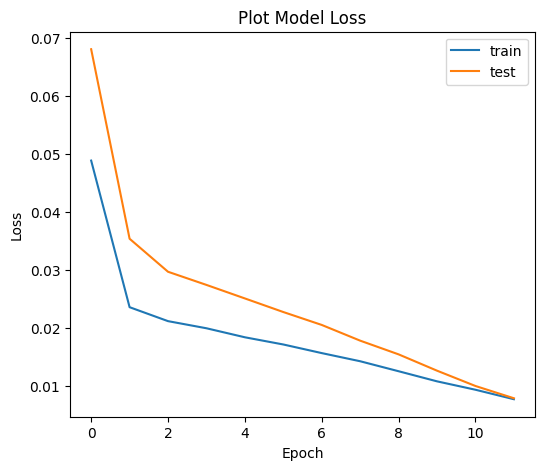

In [95]:
# Plot model loss
plt.figure(figsize=(6,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Plot Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

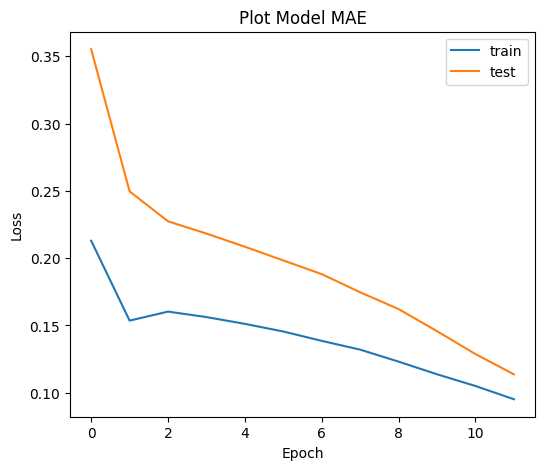

In [96]:
# Plot model MAE
plt.figure(figsize=(6,5))
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Plot Model MAE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()